In [ ]:
import requests
import time

In [ ]:
standings_url = "https://fbref.com/en/comps/9/Premier-League-Stats"

In [ ]:
data = requests.get(standings_url)

'\n<!DOCTYPE html>\n<html data-version="klecko-" data-root="" lang="en" class="no-js" >\n<head id="suppress_all_ads">\n    <meta charset="utf-8">\n    <meta http-equiv="x-ua-compatible" content="ie=edge">\n    <meta name="viewport" content="width=device-width, initial-scale=1.0, maximum-scale=2.0" />\n\n    <title>Rate Limited Request (429 error) | Sports-Reference.com</title>\n\n    <link rel="canonical" href="https://www.sports-reference.com/429.html" />\n\n<!-- CSS start -->\n <style>body,html{color:#000;font:14px/1.25 Helvetica Neue,helvetica,arial,sans-serif;margin:0;padding:0}html:not(.backstop){scroll-behavior:smooth}html:not(.backstop) div,html:not(.backstop) span{scroll-snap-margin:2.5em 0 0 0;scroll-margin:2.5em 0 0 0}body{-webkit-text-size-adjust:none;-moz-text-size-adjust:none;-ms-text-size-adjust:none;background:#c9cbcd;position:relative;z-index:0}a img{border:0}li,ol,ul{list-style-type:none;margin:0;padding:0}table td,table th{border:0}iframe{max-width:100%}code{backgroun
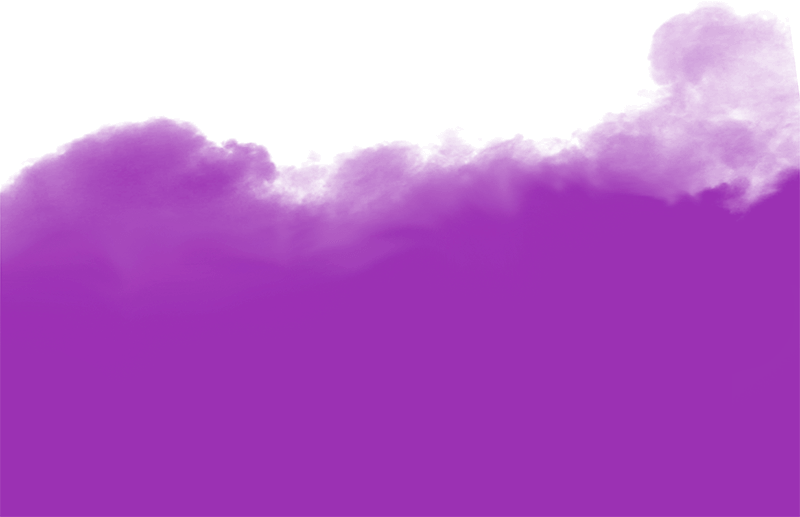

In [ ]:
 data.text

In [ ]:
# go to the page of each squad on website and check their match log

from bs4 import BeautifulSoup

In [ ]:

soup = BeautifulSoup(data.text)
print(f"Status Code: {data.status_code}")
soup.prettify()
time.sleep(10)
import requests

if data.status_code == 429:
    # Check for the Retry-After header
    retry_after = data.headers.get("Retry-After")
    if retry_after:
        print(f"Retry-After header found: {retry_after}")

        # Retry-After can be in seconds or a date-time format
        try:
            # If Retry-After is in seconds
            retry_after_seconds = int(retry_after)
            print(f"Block duration: {retry_after_seconds} seconds")
        except ValueError:
            # If Retry-After is in date-time format
            from datetime import datetime
            retry_after_datetime = datetime.strptime(retry_after, "%a, %d %b %Y %H:%M:%S %Z")
            print(f"Retry after this time: {retry_after_datetime}")
    else:
        print("Retry-After header not found. Default to waiting.")
        # Default wait time if Retry-After is not provided
        default_wait_time = 60  # 1 minute
        print(f"Waiting for {default_wait_time} seconds before retrying...")
else:
    print(f"Request successful with status code {data.status_code}")



Status Code: 429
Retry-After header found: 265
Block duration: 265 seconds


In [ ]:
# css selector of stats table
standings_table = soup.select('table.stats_table')[0]

In [ ]:
standings_table

<table class="stats_table sortable min_width force_mobilize" data-cols-to-freeze=",2" id="results2024-202591_overall"> <caption>Premier League Table</caption> <colgroup><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/></colgroup> <thead> <tr> <th aria-label="Rank" class="poptip sort_default_asc center" data-stat="rank" data-tip="&lt;strong&gt;Rank&lt;/strong&gt;&lt;br&gt;Squad finish in competition&lt;br&gt;Finish within the league or competition.&lt;br&gt;For knockout competitions may show final round reached.&lt;br&gt;Colors and arrows represent promotion/relegation or qualifiation for continental cups.&lt;br&gt;Trophy indicates team won league whether by playoffs or by leading the table.&lt;br&gt;Star indicates topped table in league USING another means of naming champion." scope="col">Rk</th> <th aria-label="Squad" class="poptip sort_default_asc center" data-stat="team" scope="col">Squad</th> <th aria-label="Mat

In [ ]:
links = standings_table.find_all('a')

In [ ]:
# get the href from all the links
def get_links(links):
  arr = []
  for l in links:
    arr.append(l.get('href'))

  return arr

# links = get_links(links)

In [ ]:
links

['/en/squads/822bd0ba/Liverpool-Stats',
 '/en/matches/1f604fbd/Liverpool-Leicester-City-December-26-2024-Premier-League',
 '/en/matches/c1a66ac0/West-Ham-United-Liverpool-December-29-2024-Premier-League',
 '/en/matches/4cef863f/North-West-Derby-Liverpool-Manchester-United-January-5-2025-Premier-League',
 '/en/matches/118f8df8/Nottingham-Forest-Liverpool-January-14-2025-Premier-League',
 '/en/matches/5e8445c1/Brentford-Liverpool-January-18-2025-Premier-League',
 '/en/players/e342ad68/Mohamed-Salah',
 '/en/players/7a2e46a8/Alisson',
 '/en/squads/18bb7c10/Arsenal-Stats',
 '/en/matches/668dad03/Arsenal-Ipswich-Town-December-27-2024-Premier-League',
 '/en/matches/7e6892e4/Brentford-Arsenal-January-1-2025-Premier-League',
 '/en/matches/52186da4/Brighton-and-Hove-Albion-Arsenal-January-4-2025-Premier-League',
 '/en/matches/ee9ce5e2/North-London-Derby-Arsenal-Tottenham-Hotspur-January-15-2025-Premier-League',
 '/en/matches/1fdaaaba/Arsenal-Aston-Villa-January-18-2025-Premier-League',
 '/en/pla

In [ ]:
# filter to only get the squad links
links = [l for l in links if '/squads/' in l]

links


['/en/squads/822bd0ba/Liverpool-Stats',
 '/en/squads/18bb7c10/Arsenal-Stats',
 '/en/squads/e4a775cb/Nottingham-Forest-Stats',
 '/en/squads/b8fd03ef/Manchester-City-Stats',
 '/en/squads/b2b47a98/Newcastle-United-Stats',
 '/en/squads/cff3d9bb/Chelsea-Stats',
 '/en/squads/4ba7cbea/Bournemouth-Stats',
 '/en/squads/8602292d/Aston-Villa-Stats',
 '/en/squads/d07537b9/Brighton-and-Hove-Albion-Stats',
 '/en/squads/fd962109/Fulham-Stats',
 '/en/squads/cd051869/Brentford-Stats',
 '/en/squads/47c64c55/Crystal-Palace-Stats',
 '/en/squads/19538871/Manchester-United-Stats',
 '/en/squads/7c21e445/West-Ham-United-Stats',
 '/en/squads/361ca564/Tottenham-Hotspur-Stats',
 '/en/squads/d3fd31cc/Everton-Stats',
 '/en/squads/8cec06e1/Wolverhampton-Wanderers-Stats',
 '/en/squads/b74092de/Ipswich-Town-Stats',
 '/en/squads/a2d435b3/Leicester-City-Stats',
 '/en/squads/33c895d4/Southampton-Stats']

In [ ]:
team_urls = [f"https://fbref.com{l}" for l in links]

team_urls

['https://fbref.com/en/squads/822bd0ba/Liverpool-Stats',
 'https://fbref.com/en/squads/18bb7c10/Arsenal-Stats',
 'https://fbref.com/en/squads/e4a775cb/Nottingham-Forest-Stats',
 'https://fbref.com/en/squads/b8fd03ef/Manchester-City-Stats',
 'https://fbref.com/en/squads/b2b47a98/Newcastle-United-Stats',
 'https://fbref.com/en/squads/cff3d9bb/Chelsea-Stats',
 'https://fbref.com/en/squads/4ba7cbea/Bournemouth-Stats',
 'https://fbref.com/en/squads/8602292d/Aston-Villa-Stats',
 'https://fbref.com/en/squads/d07537b9/Brighton-and-Hove-Albion-Stats',
 'https://fbref.com/en/squads/fd962109/Fulham-Stats',
 'https://fbref.com/en/squads/cd051869/Brentford-Stats',
 'https://fbref.com/en/squads/47c64c55/Crystal-Palace-Stats',
 'https://fbref.com/en/squads/19538871/Manchester-United-Stats',
 'https://fbref.com/en/squads/7c21e445/West-Ham-United-Stats',
 'https://fbref.com/en/squads/361ca564/Tottenham-Hotspur-Stats',
 'https://fbref.com/en/squads/d3fd31cc/Everton-Stats',
 'https://fbref.com/en/squads/

In [ ]:
team_url = team_urls[0]
data = requests.get(team_url)
data.text

'    \n      \n<!DOCTYPE html>\n<html data-version="klecko-" data-root="/home/fb/deploy/www/base" lang="en" class="no-js" >\n<head>\n    <meta charset="utf-8">\n    <meta http-equiv="x-ua-compatible" content="ie=edge">\n    <meta name="viewport" content="width=device-width, initial-scale=1.0, maximum-scale=2.0" />\n    <link rel="dns-prefetch" href="https://cdn.ssref.net/req/202501161" />\n<script>\n/* https://docs.osano.com/hc/en-us/articles/22469433444372-Google-Consent-Mode-v2  */\n  window.dataLayer = window.dataLayer ||[];\n      function gtag(){dataLayer.push(arguments);}\n      gtag(\'consent\',\'default\',{\n        \'ad_storage\':\'denied\',\n        \'analytics_storage\':\'denied\',\n        \'ad_user_data\':\'denied\',\n        \'ad_personalization\':\'denied\',\n        \'personalization_storage\':\'denied\',\n        \'functionality_storage\':\'granted\',\n        \'security_storage\':\'granted\',\n        \'wait_for_update\': 500\n      });\n      gtag("set", "ads_data_re

In [ ]:
import pandas as pd

In [ ]:
matches = pd.read_html(str(data.text), match = "Scores & Fixtures")

<ipython-input-17-b6ca1cfb66f6>:1: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  matches = pd.read_html(str(data.text), match = "Scores & Fixtures")


In [ ]:
matches[0]

,Date,Time,Comp,Round,Day,Venue,Result,GF,GA,Opponent,xG,xGA,Poss,Attendance,Captain,Formation,Opp Formation,Referee,Match Report,Notes
0,2024-08-17,12:30,Premier League,Matchweek 1,Sat,Away,W,2.0,0.0,Ipswich Town,2.6,0.5,62.0,30014.0,Virgil van Dijk,4-2-3-1,4-2-3-1,Tim Robinson,Match Report,NaN
1,2024-08-25,16:30,Premier League,Matchweek 2,Sun,Home,W,2.0,0.0,Brentford,2.5,0.5,62.0,60017.0,Virgil van Dijk,4-2-3-1,4-4-2,Stuart Attwell,Match Report,NaN
2,2024-09-01,16:00,Premier League,Matchweek 3,Sun,Away,W,3.0,0.0,Manchester Utd,1.8,1.4,47.0,73738.0,Virgil van Dijk,4-2-3-1,4-2-3-1,Anthony Taylor,Match Report,NaN
3,2024-09-14,15:00,Premier League,Matchweek 4,Sat,Home,L,0.0,1.0,Nott'ham Forest,0.9,0.4,68.0,60344.0,Virgil van Dijk,4-2-3-1,4-2-3-1,Michael Oliver,Match Report,NaN
4,2024-09-17,21:00,Champions Lg,League phase,Tue,Away,W,3.0,1.0,it Milan,3.1,0.6,51.0,59826.0,Virgil van Dijk,4-2-3-1,4-2-3-1,Espen Eskås,Match Report,NaN
5,2024-09-21,15:00,Premier League,Matchweek 5,Sat,Home,W,3.0,0.0,Bournemouth,2.0,1.1,58.0,60347.0,Virgil van Dijk,4-2-3-1,4-2-3-1,Tony Harrington,Match Report,NaN
6,2024-09-25,20:00,EFL Cup,Third round,Wed,Home,W,5.0,1.0,West Ham,NaN,NaN,61.0,60044.0,Joe Gomez,4-2-3-1,4-2-3-1,Andy Madley,Match Report,NaN
7,2024-09-28,17:30,Premier League,Matchweek 6,Sat,Away,W,2.0,1.0,Wolves,2.5,0.6,55.0,31413.0,Virgil van Dijk,4-2-3-1,4-1-4-1,Anthony Taylor,Match Report,NaN
8,2024-10-02,20:00,Champions Lg,League phase,Wed,Home,W,2.0,0.0,it Bologna,1.2,0.6,51.0,59816.0,Virgil van Dijk,4-2-3-1,4-1-4-1,Nikola Dabanović,Match Report,NaN
9,2024-10-05,12:30,Premier League,Matchweek 7,Sat,Away,W,1.0,0.0,Crystal Palace,1.4,0.6,68.0,25185.0,Virgil van Dijk,4-2-3-1,3-4-3,Simon Hooper,Match Report,NaN


In [ ]:
time.sleep(10)
soup = BeautifulSoup(data.text)

In [ ]:
links = soup.find_all('a')

In [ ]:
links = get_links(links)

In [ ]:
links = [l for l in links if l and 'all_comps/shooting/' in l]

In [ ]:
links

['/en/squads/822bd0ba/2024-2025/matchlogs/all_comps/shooting/Liverpool-Match-Logs-All-Competitions',
 '/en/squads/822bd0ba/2024-2025/matchlogs/all_comps/shooting/Liverpool-Match-Logs-All-Competitions',
 '/en/squads/822bd0ba/2024-2025/matchlogs/all_comps/shooting/Liverpool-Match-Logs-All-Competitions',
 '/en/squads/822bd0ba/2024-2025/matchlogs/all_comps/shooting/Liverpool-Match-Logs-All-Competitions']

In [ ]:
time.sleep(10)
data = requests.get(f"https://fbref.com{links[0]}")

In [ ]:
shooting = pd.read_html(data.text, match = "Shooting")[0]

<ipython-input-25-a59c47b41fc5>:1: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  shooting = pd.read_html(data.text, match = "Shooting")[0]


In [ ]:
shooting.head()

For Liverpool                                                              \
           Date   Time            Comp         Round  Day Venue Result   GF   
0    2024-08-17  12:30  Premier League   Matchweek 1  Sat  Away      W  2.0   
1    2024-08-25  16:30  Premier League   Matchweek 2  Sun  Home      W  2.0   
2    2024-09-01  16:00  Premier League   Matchweek 3  Sun  Away      W  3.0   
3    2024-09-14  15:00  Premier League   Matchweek 4  Sat  Home      L  0.0   
4    2024-09-17  21:00    Champions Lg  League phase  Tue  Away      W  3.0   

                         ... Standard               Expected               \
    GA         Opponent  ...     Dist   FK PK PKatt       xG npxG npxG/Sh   
0  0.0     Ipswich Town  ...     14.8  0.0  0     0      2.6  2.6    0.15   
1  0.0        Brentford  ...     13.6  1.0  0     0      2.5  2.5    0.14   
2  0.0   Manchester Utd  ...     13.4  0.0  0     0      1.8  1.8    0.16   
3  1.0  Nott'ham Forest  ...     14.9  0.0  0     0      0.9  0.9    0.07   
4  1.0         it Milan  ...     15.7  1.0  0     0      3.1  3.1    0.14   

               Unnamed: 25_level_0  
  G-xG np:G-xG        Match Report  
0 -0.6    -0.6        Match Report  
1 -0.5    -0.5        Match Report  
2  1.2     1.2        Match Report  
3 -0.9    -0.9        Match Report  
4 -0.1    -0.1        Match Report  

[5 rows x 26 columns]

In [ ]:
# removing 2nd level indices
shooting.columns = shooting.columns.droplevel()

In [ ]:
shooting.head()

,Date,Time,Comp,Round,Day,Venue,Result,GF,GA,Opponent,...,Dist,FK,PK,PKatt,xG,npxG,npxG/Sh,G-xG,np:G-xG,Match Report
0,2024-08-17,12:30,Premier League,Matchweek 1,Sat,Away,W,2.0,0.0,Ipswich Town,...,14.8,0.0,0,0,2.6,2.6,0.15,-0.6,-0.6,Match Report
1,2024-08-25,16:30,Premier League,Matchweek 2,Sun,Home,W,2.0,0.0,Brentford,...,13.6,1.0,0,0,2.5,2.5,0.14,-0.5,-0.5,Match Report
2,2024-09-01,16:00,Premier League,Matchweek 3,Sun,Away,W,3.0,0.0,Manchester Utd,...,13.4,0.0,0,0,1.8,1.8,0.16,1.2,1.2,Match Report
3,2024-09-14,15:00,Premier League,Matchweek 4,Sat,Home,L,0.0,1.0,Nott'ham Forest,...,14.9,0.0,0,0,0.9,0.9,0.07,-0.9,-0.9,Match Report
4,2024-09-17,21:00,Champions Lg,League phase,Tue,Away,W,3.0,1.0,it Milan,...,15.7,1.0,0,0,3.1,3.1,0.14,-0.1,-0.1,Match Report


In [ ]:
# we can merge the two dataframes as they refer to the same matches and just have different stats

team_data = matches[0].merge(shooting[["Date","Sh","SoT","Dist","FK","PK","PKatt"]], on="Date")

In [ ]:
team_data.head()

,Date,Time,Comp,Round,Day,Venue,Result,GF,GA,Opponent,...,Opp Formation,Referee,Match Report,Notes,Sh,SoT,Dist,FK,PK,PKatt
0,2024-08-17,12:30,Premier League,Matchweek 1,Sat,Away,W,2.0,0.0,Ipswich Town,...,4-2-3-1,Tim Robinson,Match Report,NaN,18,5,14.8,0.0,0,0
1,2024-08-25,16:30,Premier League,Matchweek 2,Sun,Home,W,2.0,0.0,Brentford,...,4-4-2,Stuart Attwell,Match Report,NaN,19,8,13.6,1.0,0,0
2,2024-09-01,16:00,Premier League,Matchweek 3,Sun,Away,W,3.0,0.0,Manchester Utd,...,4-2-3-1,Anthony Taylor,Match Report,NaN,11,3,13.4,0.0,0,0
3,2024-09-14,15:00,Premier League,Matchweek 4,Sat,Home,L,0.0,1.0,Nott'ham Forest,...,4-2-3-1,Michael Oliver,Match Report,NaN,14,5,14.9,0.0,0,0
4,2024-09-17,21:00,Champions Lg,League phase,Tue,Away,W,3.0,1.0,it Milan,...,4-2-3-1,Espen Eskås,Match Report,NaN,23,11,15.7,1.0,0,0


In [ ]:
matches[0].shape

(53, 20)

In [ ]:
shooting.shape

(33, 26)

In [ ]:
# now we use a loop to scrape the data for multiple teams for multiple years
years = list(range(2022, 2020,-1))
years

[2022, 2021]

In [ ]:
# this list will hold multiple elements with match logs for one team for one season
all_matches = []

In [ ]:
for year in years:
  standings_url = f"https://fbref.com/en/comps/9/{year}-{year+1}/{year}-{year+1}-Premier-League-Stats"
  data = requests.get(standings_url)
  soup = BeautifulSoup(data.text)
  time.sleep(10)
  standings_table = soup.select('table.stats_table')[0]

  links = standings_table.find_all('a')
  links = get_links(links)
  links = [l for l in links if '/squads/' in l]
  team_urls = [f"https://fbref.com{l}" for l in links]

  # getting stats for previous season
  # previous_season = soup.select("a.prev")[0].get("href")
  # standings_url = f"https://fbref.com/{previous_season}"

  for team_url in team_urls:
    team_name = team_url.split("/")[-1].replace("-Stats", "").replace("-", " ")
    time.sleep(7)
    data = requests.get(team_url)
    matches = pd.read_html(data.text, match = "Scores & Fixtures")[0]

    # getting the shooting stats for each team
    soup = BeautifulSoup(data.text)
    time.sleep(7)
    links = soup.find_all('a')
    links = get_links(links)
    links = [l for l in links if l and 'all_comps/shooting/' in l]

    data = requests.get(f"https://fbref.com{links[0]}")
    shooting = pd.read_html(data.text, match = "Shooting")[0]
    shooting.columns = shooting.columns.droplevel()

    try:
      team_data = matches.merge(shooting[["Date","Sh","SoT","Dist","FK","PK","PKatt"]], on="Date")
    except ValueError:
      continue

    team_data = team_data[team_data["Comp"] == "Premier League"]
    team_data["Season"] = year
    team_data["Team"] = team_name
    all_matches.append(team_data)



<ipython-input-19-f263887432fa>:21: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  matches = pd.read_html(data.text, match = "Scores & Fixtures")[0]
<ipython-input-19-f263887432fa>:31: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  shooting = pd.read_html(data.text, match = "Shooting")[0]
<ipython-input-19-f263887432fa>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_data["Season"] = year
<ipython-input-19-f263887432fa>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

In [ ]:
standings_url = "https://fbref.com/en/comps/9/Premier-League-Stats"

In [ ]:
match_df = pd.concat(all_matches)

match_df.columns = [c.lower() for c in match_df.columns]

#save to csv
match_df.to_csv("2022-2021.csv")
match_df.head()

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,match report,notes,sh,sot,dist,fk,pk,pkatt,season,team
1,2022-08-07,16:30,Premier League,Matchweek 1,Sun,Away,W,2,0,West Ham,...,Match Report,NaN,13.0,1.0,18.7,1.0,1,1,2022,Manchester City
2,2022-08-13,15:00,Premier League,Matchweek 2,Sat,Home,W,4,0,Bournemouth,...,Match Report,NaN,19.0,7.0,17.5,0.0,0,0,2022,Manchester City
3,2022-08-21,16:30,Premier League,Matchweek 3,Sun,Away,D,3,3,Newcastle Utd,...,Match Report,NaN,21.0,10.0,16.2,1.0,0,0,2022,Manchester City
4,2022-08-27,15:00,Premier League,Matchweek 4,Sat,Home,W,4,2,Crystal Palace,...,Match Report,NaN,18.0,5.0,14.1,0.0,0,0,2022,Manchester City
5,2022-08-31,19:30,Premier League,Matchweek 5,Wed,Home,W,6,0,Nott'ham Forest,...,Match Report,NaN,17.0,9.0,14.8,0.0,0,0,2022,Manchester City


In [ ]:
matches.shape

(43, 20)

In [ ]:
df1 = pd.read_csv("2024-2023.csv")
df2 = pd.read_csv("2022-2021.csv")
df3 = pd.read_csv("2020-2019.csv")
df4 = pd.read_csv("2018-2017.csv")
final_df = pd.concat([df1, df2, df3, df4], ignore_index=True)
final_df.head()


,Unnamed: 0,date,time,comp,round,day,venue,result,gf,ga,...,match report,notes,sh,sot,dist,fk,pk,pkatt,season,team
0,0,2024-08-17,12:30,Premier League,Matchweek 1,Sat,Away,W,2.0,0.0,...,Match Report,NaN,18.0,5.0,14.8,0.0,0,0,2024,Liverpool
1,1,2024-08-25,16:30,Premier League,Matchweek 2,Sun,Home,W,2.0,0.0,...,Match Report,NaN,19.0,8.0,13.6,1.0,0,0,2024,Liverpool
2,2,2024-09-01,16:00,Premier League,Matchweek 3,Sun,Away,W,3.0,0.0,...,Match Report,NaN,11.0,3.0,13.4,0.0,0,0,2024,Liverpool
3,3,2024-09-14,15:00,Premier League,Matchweek 4,Sat,Home,L,0.0,1.0,...,Match Report,NaN,14.0,5.0,14.9,0.0,0,0,2024,Liverpool
4,5,2024-09-21,15:00,Premier League,Matchweek 5,Sat,Home,W,3.0,0.0,...,Match Report,NaN,19.0,12.0,16.6,0.0,0,0,2024,Liverpool


In [ ]:
final_df.shape

(5756, 29)

In [ ]:
final_df.to_csv("final_data.csv", index=False)